## Purpose of investigation:

It's been a while since I've done an EDA project -- probably since May 2022. Typically in data science and SWE, the purpose of coding is to generate solutions: whether it's data insights into optimising a portfolio, to improving servers to reduce latency, problem solving is at the heart of a lot of programming work. I thought to myself, *what is a problem that I'd find useful solving?*

The answer? 

<center>
<img src="https://img.chelseafc.com//image/upload/f_auto,q_auto:best,f_auto,q_90,w_1440,c_fill,g_faces/editorial/match-reports/2022-23/Udinese%20first%20game/Udinese_first-game_starting_team.jpg", width=500>
</center>

***__Chelsea Football Club__***

If you follow Premier League football, you'd understand why that is. Chelsea's fall from grace is concerning, having won one game out of our last 7 in the Premier League. I thought, this would be a great chance to derive some sort of conclusion about the players and play styles, and look for alternatives who could refresh the squad.

### Key points to consider

> Who is underperforming? And conversly, who is performing? 


> Who are our least and most creative players in the squad? 


> Who has the best minutes to goal ratio? 


Hopefully by answering these questions, I can deduce what sort of player profile the club needs. It's the start of the January window, it seems rather fitting. There are limitations to this analysis however, so please take it with a pinch of salt. As much as *"Numbers don't lie"* goes, observing a player is crucial too, or else by that metric Kevin De Bruyne is a better midfielder than the likes of Xavi and Iniesta.

#### Import libraries and data and reformat DataFrame

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('data.csv')
df = df[:25]

# Remove goalkeepers as they don't really play a role in creation and attack

df = df.loc[df['Pos'] != 'GK']
df.reset_index()

df['Min'] = pd.to_numeric(df['Min'].str.replace(',', ''))

df['XG_diff'] = df['Gls90'] - df['xG90']
df['XA_diff'] = df['Ast90'] - df['xA90']
df['MinPerGoal'] = df['Min'] / df['Gls']

df.columns = df.columns.str.strip()

Let's take a look at the most over/underperforming goalscorers

[Text(0, 0, 'Pierre-Emerick Aubameyang'),
 Text(1, 0, 'Ben Chilwell'),
 Text(2, 0, 'Mason Mount'),
 Text(3, 0, 'Kalidou Koulibaly'),
 Text(4, 0, 'Armando Broja')]

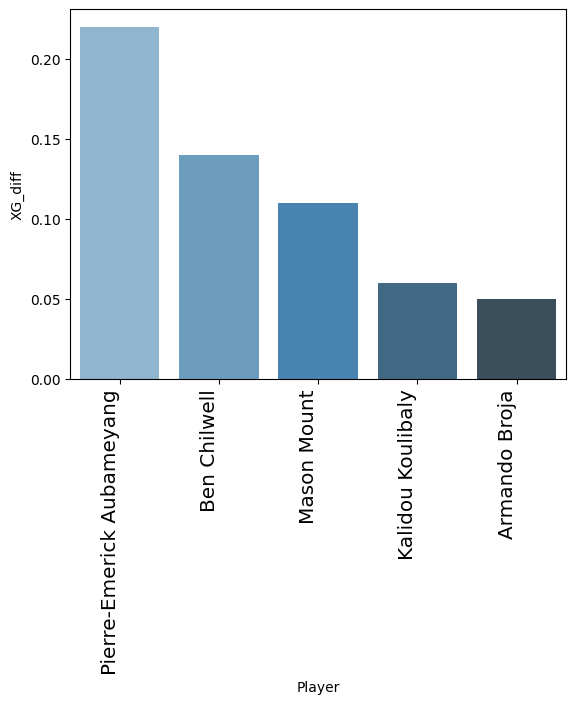

In [10]:
uA = df.sort_values('XG_diff', axis=0, ascending=False)[["Player", "XG_diff"]]
chart = sns.barplot(x='Player', y='XG_diff', data=uA[:5], palette='Blues_d')
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

Now for the least performing goalscorers:

[Text(0, 0, 'Denis Zakaria'),
 Text(1, 0, 'Carney Chukwuemeka'),
 Text(2, 0, 'Hakim Ziyech'),
 Text(3, 0, 'Ruben Loftus-Cheek'),
 Text(4, 0, 'Mateo Kovačić')]

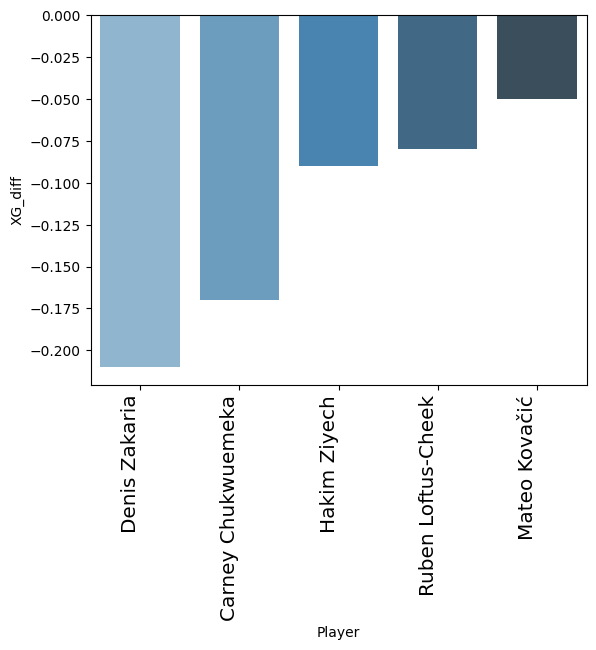

In [11]:
uA = df.sort_values('XG_diff', axis=0, ascending=True)[["Player", "XG_diff"]]
chart = sns.barplot(x='Player', y='XG_diff', data=uA[:5], palette='Blues_d')
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

To find our most creative players, based on expected assists difference:

[Text(0, 0, 'Ben Chilwell'),
 Text(1, 0, 'Marc Cucurella'),
 Text(2, 0, 'Thiago Silva'),
 Text(3, 0, 'Christian Pulisic'),
 Text(4, 0, 'Mateo Kovačić')]

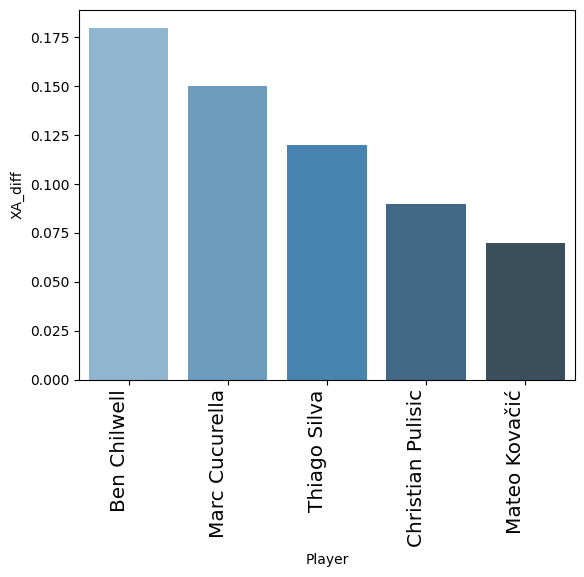

In [12]:
most_creative = df.sort_values('XA_diff', axis=0, ascending=False)[["Player", "XA_diff"]]
chart = sns.barplot(x='Player', y='XA_diff', data=most_creative[:5], palette='Blues_d')
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=90,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

Cucurella, laughable. Maybe numbers do lie. And now for the *least* creative players.

[Text(0, 0, 'Lewis Hall'),
 Text(1, 0, "N'Golo Kanté"),
 Text(2, 0, 'Pierre-Emerick Aubameyang'),
 Text(3, 0, 'César Azpilicueta'),
 Text(4, 0, 'Ruben Loftus-Cheek')]

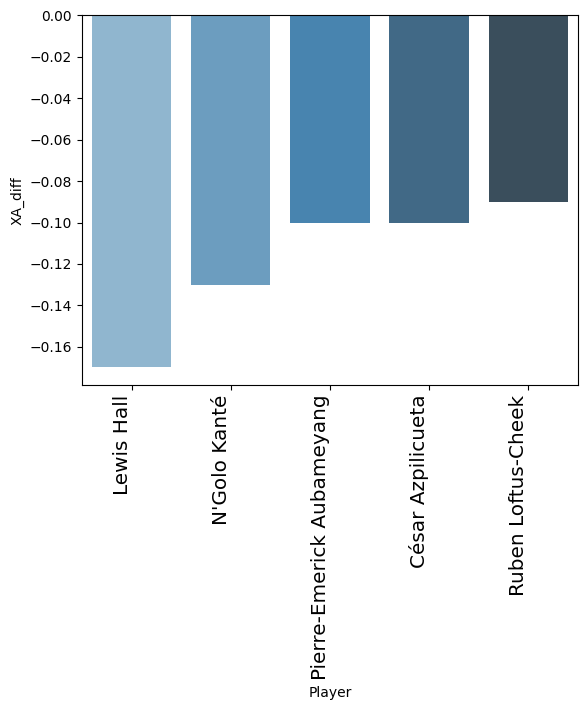

In [13]:
least_creative = df.sort_values('XA_diff', axis=0, ascending=True)[["Player", "XA_diff"]]
chart = sns.barplot(x='Player', y='XA_diff', data=least_creative[:5], palette='Blues_d')
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=90,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)


Who has the best/worst minutes to goal ratio?

[Text(0, 0, 'Kai Havertz'),
 Text(1, 0, 'Armando Broja'),
 Text(2, 0, 'Pierre-Emerick Aubameyang'),
 Text(3, 0, 'Raheem Sterling'),
 Text(4, 0, 'Mason Mount'),
 Text(5, 0, 'Ben Chilwell'),
 Text(6, 0, 'Jorginho'),
 Text(7, 0, 'Christian Pulisic'),
 Text(8, 0, 'Conor Gallagher'),
 Text(9, 0, 'Reece James')]

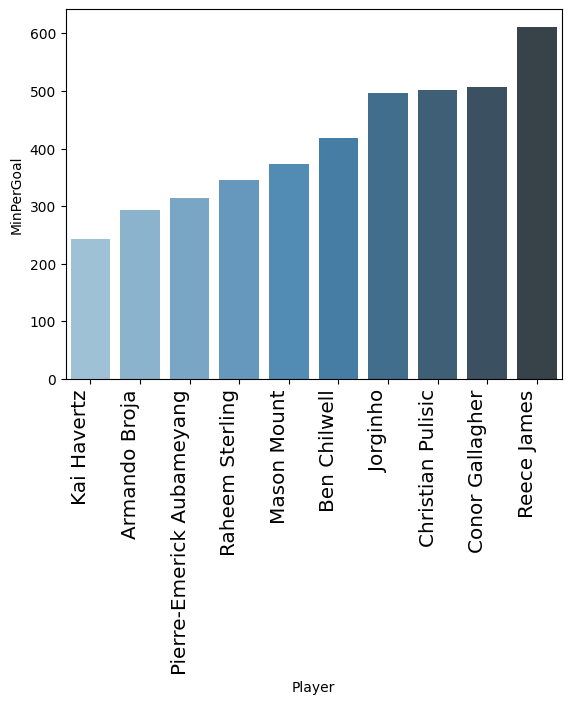

In [18]:
best_min_per_goal = df.sort_values('MinPerGoal', axis=0, ascending=True)[["Player", "MinPerGoal"]]
chart = sns.barplot(x='Player', y='MinPerGoal', data=best_min_per_goal[:10], palette='Blues_d')
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=90,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
    

[Text(0, 0, 'Carney Chukwuemeka'),
 Text(1, 0, 'Wesley Fofana'),
 Text(2, 0, 'Lewis Hall'),
 Text(3, 0, 'Denis Zakaria'),
 Text(4, 0, 'Hakim Ziyech'),
 Text(5, 0, 'Ruben Loftus-Cheek'),
 Text(6, 0, 'Marc Cucurella'),
 Text(7, 0, 'Trevoh Chalobah'),
 Text(8, 0, 'César Azpilicueta'),
 Text(9, 0, 'Thiago Silva')]

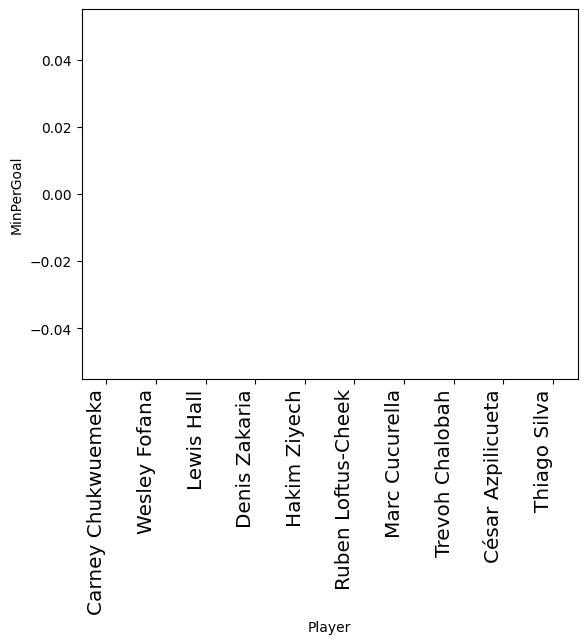

In [19]:
worst_min_per_goal = df.sort_values('MinPerGoal', axis=0, ascending=False)[["Player", "MinPerGoal"]]
chart = sns.barplot(x='Player', y='MinPerGoal', data=worst_min_per_goal[:10], palette='Blues_d')
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=90,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)